# <center><font color='softblue'> CA5: Neural Networks & Deep Learning(Part2)</font><center>
## <center> `Amir Ali Vahidi 810199511` <center>

In [23]:
import keras
import tensorflow

In [24]:
# plot function
import matplotlib.pyplot as plt
def plot_function(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [25]:
# print percission, recall, f1-score for training data
from sklearn.metrics import classification_report
def classification_report_function(model, x_train, y_train):
    y_pred = model.predict(x_train)
    y_pred = y_pred.argmax(axis=1)
    y_true = y_train.argmax(axis=1)
    print(classification_report(y_true, y_pred))

### <font color='cyan'> Part1: Network Design </font>

In [26]:
# import CIFAR-10 dataset and reshape it to list, image is 32*32
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot encoding using to_categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [27]:
# define the model with the given architecture
# Learning rate = 0.01
# epochs = 10
# batch size = 32
# activation function = relu
# optimizer = SGD

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(150, input_dim=3072, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.005)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# print number of parameters in each layer
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 150)               460950    
                                                                 
 dense_25 (Dense)            (None, 100)               15100     
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 477,060
Trainable params: 477,060
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### `Parameters in the layers:`
The reason for the number of parameters in the layers is that the number of parameters in the layers is the number of weights and biases in the layers. The number of weights and biases in the layers is the number of neurons in the previous layer multiplied by the number of neurons in the next layer.

### Training Data

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9362 - accuracy: 0.3084 - val_loss: 1.8042 - val_accuracy: 0.3687
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7705 - accuracy: 0.3748 - val_loss: 1.7236 - val_accuracy: 0.3947
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6938 - accuracy: 0.4029 - val_loss: 1.7113 - val_accuracy: 0.3922
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6384 - accuracy: 0.4223 - val_loss: 1.6176 - val_accuracy: 0.4299
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5978 - accuracy: 0.4378 - val_loss: 1.6118 - val_accuracy: 0.4302
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5645 - accuracy: 0.4500 - val_loss: 1.5764 - val_accuracy: 0.4391
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5355 - accuracy: 0.4589 - val_loss: 1.5345 - val_accuracy:

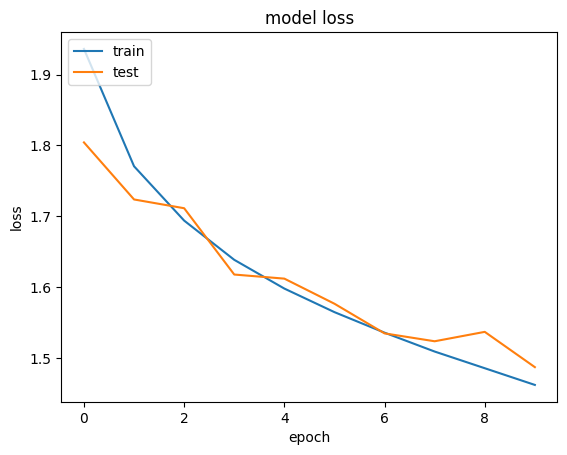

1563/1563 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.55      0.52      0.54      5000
           1       0.57      0.68      0.62      5000
           2       0.41      0.35      0.38      5000
           3       0.36      0.37      0.36      5000
           4       0.47      0.40      0.43      5000
           5       0.34      0.51      0.41      5000
           6       0.59      0.40      0.48      5000
           7       0.61      0.52      0.56      5000
           8       0.57      0.70      0.63      5000
           9       0.58      0.49      0.53      5000

    accuracy                           0.49     50000
   macro avg       0.50      0.49      0.49     50000
weighted avg       0.50      0.49      0.49     50000


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      1000
           1       

In [28]:
# train the model and plot loss and accuracy for each epoch
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
# plot loss and accuracy for each epoch in single figure
plot_function(history)

# print percission, recall, f1-score for training data
classification_report_function(model, x_train, y_train)

print()
# test performance
# print percission, recall, f1-score for test data
classification_report_function(model, x_test, y_test)

### <font color='cyan'> Part2: Change Impact </font>

**1. What is momentum and why us it used in the training process?**

Momentum is a method that uses the gradient of the previous step to update the current step. It is used to accelerate the training process.

**2. Train the model with momentum = 0.5 and 0.9 and 0.98. What is the impact on the training time and the accuracy?**

The training time is reduced and the accuracy is improved.

**3. Is increasing momentum always beneficial? Why or why not?**

No, it is not always beneficial. If the momentum is too large, the model will not converge.

Epoch 1/10


C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 1.4788 - accuracy: 0.4754 - val_loss: 1.4837 - val_accuracy: 0.4754
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4452 - accuracy: 0.4875 - val_loss: 1.4646 - val_accuracy: 0.4770
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4209 - accuracy: 0.4946 - val_loss: 1.4673 - val_accuracy: 0.4809
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3937 - accuracy: 0.5072 - val_loss: 1.4620 - val_accuracy: 0.4769
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3713 - accuracy: 0.5126 - val_loss: 1.3935 - val_accuracy: 0.5040
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3510 - accuracy: 0.5212 - val_loss: 1.4304 - val_accuracy: 0.4884
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3336 - accuracy: 0.5237 - val_loss: 1.4063 - val_accuracy: 0.5042
Epo

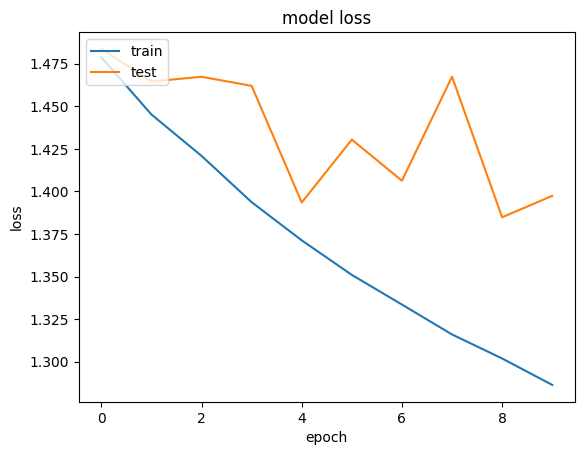

1563/1563 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      5000
           1       0.74      0.64      0.68      5000
           2       0.49      0.33      0.40      5000
           3       0.51      0.24      0.33      5000
           4       0.35      0.72      0.47      5000
           5       0.47      0.50      0.48      5000
           6       0.55      0.63      0.59      5000
           7       0.73      0.53      0.61      5000
           8       0.64      0.73      0.69      5000
           9       0.63      0.64      0.63      5000

    accuracy                           0.55     50000
   macro avg       0.57      0.55      0.55     50000
weighted avg       0.57      0.55      0.55     50000


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.61      0.51      0.56      1000
           1       

In [29]:
# train model with momentum 0.5
# plot loss and accuracy for each epoch in single figure
# print percission, recall, f1-score for training data

# momentum = 0.5
sgd = SGD(lr=0.005, momentum=0.5)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_function(history)
classification_report_function(model, x_train, y_train)

print()
# test performance
# print percission, recall, f1-score for test data
classification_report_function(model, x_test, y_test)

Epoch 1/10


C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1563/1563 [==============================] - 3s 2ms/step - loss: 1.5623 - accuracy: 0.4407 - val_loss: 1.6268 - val_accuracy: 0.4265
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4745 - accuracy: 0.4730 - val_loss: 1.4801 - val_accuracy: 0.4717
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4279 - accuracy: 0.4899 - val_loss: 1.4145 - val_accuracy: 0.4972
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3890 - accuracy: 0.5049 - val_loss: 1.4889 - val_accuracy: 0.4747
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3529 - accuracy: 0.5193 - val_loss: 1.3950 - val_accuracy: 0.5081
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3299 - accuracy: 0.5250 - val_loss: 1.4142 - val_accuracy: 0.4993
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3119 - accuracy: 0.5321 - val_loss: 1.4580 - val_accuracy: 0.4832
Epo

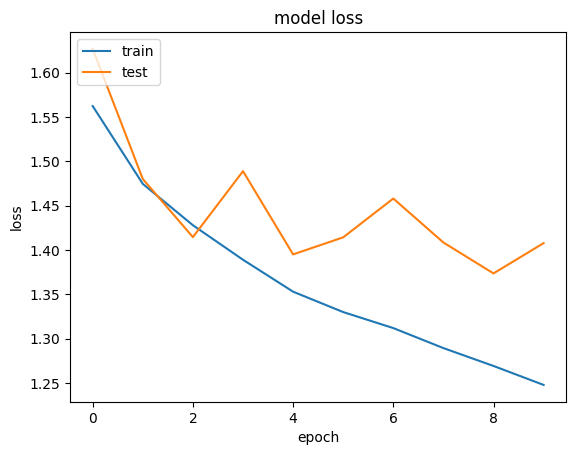

1563/1563 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.73      0.49      0.59      5000
           1       0.73      0.68      0.70      5000
           2       0.51      0.39      0.44      5000
           3       0.37      0.44      0.40      5000
           4       0.57      0.42      0.48      5000
           5       0.40      0.60      0.48      5000
           6       0.60      0.65      0.62      5000
           7       0.64      0.66      0.65      5000
           8       0.72      0.68      0.70      5000
           9       0.60      0.70      0.65      5000

    accuracy                           0.57     50000
   macro avg       0.59      0.57      0.57     50000
weighted avg       0.59      0.57      0.57     50000


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.71      0.47      0.57      1000
           1       

In [30]:
# train model with momentum 0.9
# plot loss and accuracy for each epoch in single figure
# print percission, recall, f1-score for training data

# momentum = 0.9
sgd = SGD(lr=0.005, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_function(history)
classification_report_function(model, x_train, y_train)

print()
# test performance
# print percission, recall, f1-score for test data
classification_report_function(model, x_test, y_test)

Epoch 1/10


C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1563/1563 [==============================] - 3s 2ms/step - loss: 1.8462 - accuracy: 0.3232 - val_loss: 1.9122 - val_accuracy: 0.2940
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8208 - accuracy: 0.3355 - val_loss: 1.8423 - val_accuracy: 0.3367
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8385 - accuracy: 0.3268 - val_loss: 1.8341 - val_accuracy: 0.3286
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8498 - accuracy: 0.3167 - val_loss: 1.8203 - val_accuracy: 0.3391
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8648 - accuracy: 0.3164 - val_loss: 1.8679 - val_accuracy: 0.3144
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8411 - accuracy: 0.3236 - val_loss: 1.8244 - val_accuracy: 0.3288
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8306 - accuracy: 0.3182 - val_loss: 1.8462 - val_accuracy: 0.3279
Epo

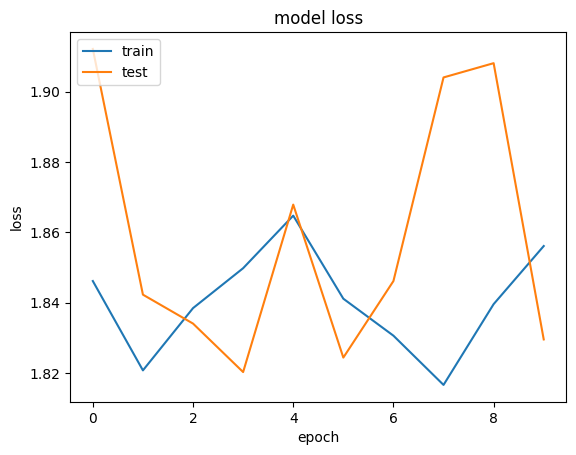

1563/1563 [==============================] - 2s 972us/step
              precision    recall  f1-score   support

           0       0.36      0.55      0.43      5000
           1       0.41      0.60      0.49      5000
           2       0.23      0.06      0.09      5000
           3       0.27      0.40      0.32      5000
           4       0.41      0.24      0.30      5000
           5       0.48      0.12      0.19      5000
           6       0.43      0.45      0.44      5000
           7       0.30      0.54      0.39      5000
           8       0.40      0.52      0.45      5000
           9       0.38      0.13      0.19      5000

    accuracy                           0.36     50000
   macro avg       0.37      0.36      0.33     50000
weighted avg       0.37      0.36      0.33     50000


313/313 [==============================] - 0s 993us/step
              precision    recall  f1-score   support

           0       0.35      0.54      0.43      1000
           1   

In [31]:
# train model with momentum 0.98
# plot loss and accuracy for each epoch in single figure
# print percission, recall, f1-score for training data

# momentum = 0.98
sgd = SGD(lr=0.005, momentum=0.98)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_function(history)
classification_report_function(model, x_train, y_train)

print()
# test performance
# print percission, recall, f1-score for test data
classification_report_function(model, x_test, y_test)

Epoch 1/10


C:\Users\Amir Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1563/1563 [==============================] - 4s 2ms/step - loss: 1.6800 - accuracy: 0.3914 - val_loss: 1.6830 - val_accuracy: 0.3964
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6268 - accuracy: 0.4131 - val_loss: 1.6128 - val_accuracy: 0.4233
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5839 - accuracy: 0.4286 - val_loss: 1.5918 - val_accuracy: 0.4285
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5584 - accuracy: 0.4384 - val_loss: 1.5718 - val_accuracy: 0.4271
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5343 - accuracy: 0.4493 - val_loss: 1.5821 - val_accuracy: 0.4348
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5134 - accuracy: 0.4555 - val_loss: 1.5527 - val_accuracy: 0.4426
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4996 - accuracy: 0.4620 - val_loss: 1.5525 - val_accuracy: 0.4422
Epo

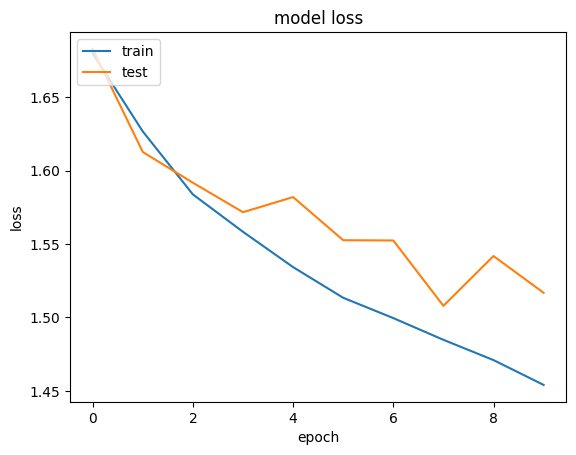

1563/1563 [==============================] - 2s 988us/step
              precision    recall  f1-score   support

           0       0.49      0.61      0.54      5000
           1       0.63      0.59      0.61      5000
           2       0.35      0.37      0.36      5000
           3       0.35      0.30      0.33      5000
           4       0.41      0.45      0.43      5000
           5       0.47      0.32      0.38      5000
           6       0.47      0.58      0.52      5000
           7       0.52      0.59      0.55      5000
           8       0.64      0.59      0.62      5000
           9       0.57      0.50      0.53      5000

    accuracy                           0.49     50000
   macro avg       0.49      0.49      0.49     50000
weighted avg       0.49      0.49      0.49     50000


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.48      0.59      0.53      1000
           1     

In [32]:
# train the model with previous architecture and learning rate 0.001
# Optimizer = Adam

from keras.optimizers import Adam
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_function(history)
classification_report_function(model, x_train, y_train)

print()
# test performance
# print percission, recall, f1-score for test data
classification_report_function(model, x_test, y_test)

**Result of Adam compare to SGD**

Adam is better than SGD in terms of accuracy and training time.

`Impact of numbers of epochs`

The number of epochs is the number of times the model is trained. The more the number of epochs, the more the model is trained, the better the accuracy.

**Is it always good to use more epochs than needed? Why or why not?**

No, it is not always good to use more epochs than needed. If the number of epochs is too large, the model will overfit.

`Impact of Loss Function`

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.5042 - val_loss: 0.0661 - val_accuracy: 0.4744
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0626 - accuracy: 0.5073 - val_loss: 0.0661 - val_accuracy: 0.4766
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0627 - accuracy: 0.5065 - val_loss: 0.0664 - val_accuracy: 0.4725
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0632 - accuracy: 0.5024 - val_loss: 0.0678 - val_accuracy: 0.4569
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.4977 - val_loss: 0.0682 - val_accuracy: 0.4553
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0641 - accuracy: 0.4940 - val_loss: 0.0671 - val_accuracy: 0.4678
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.4962 - val_loss: 0.0689 - val_accuracy:

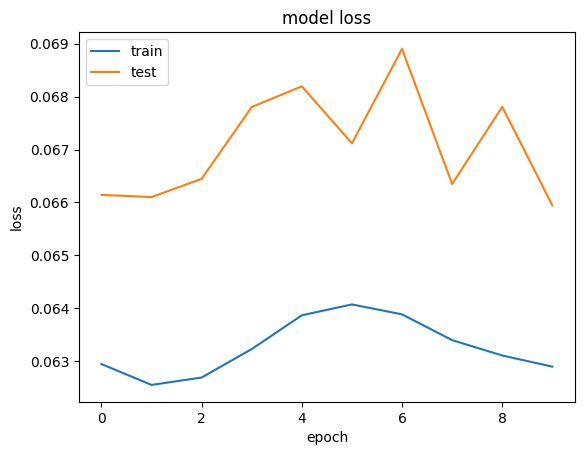

1563/1563 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      5000
           1       0.63      0.67      0.65      5000
           2       0.41      0.37      0.39      5000
           3       0.37      0.33      0.35      5000
           4       0.53      0.35      0.42      5000
           5       0.42      0.47      0.45      5000
           6       0.57      0.56      0.56      5000
           7       0.51      0.68      0.58      5000
           8       0.66      0.67      0.66      5000
           9       0.56      0.61      0.58      5000

    accuracy                           0.53     50000
   macro avg       0.52      0.53      0.52     50000
weighted avg       0.52      0.53      0.52     50000


313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1000
           1       

In [33]:
# train the model using MSE loss function
# Optimizer = Adam

model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_function(history)
classification_report_function(model, x_train, y_train)

print()
# test performance
# print percission, recall, f1-score for test data
classification_report_function(model, x_test, y_test)

`Why MSE is not good for classification? When do we use MSE?`

MSE is not good for classification because it is not a good measure of the distance between two points. We use MSE when we want to predict a continuous value.

`Regularization Impact`

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9853 - accuracy: 0.2758 - val_loss: 1.8057 - val_accuracy: 0.3536
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8276 - accuracy: 0.3339 - val_loss: 1.7220 - val_accuracy: 0.3776
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7806 - accuracy: 0.3535 - val_loss: 1.7325 - val_accuracy: 0.3777
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7525 - accuracy: 0.3671 - val_loss: 1.6704 - val_accuracy: 0.4005
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7335 - accuracy: 0.3709 - val_loss: 1.6492 - val_accuracy: 0.4097
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7185 - accuracy: 0.3766 - val_loss: 1.6268 - val_accuracy: 0.4145
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6999 - accuracy: 0.3838 - val_loss: 1.6437 - val_accuracy:

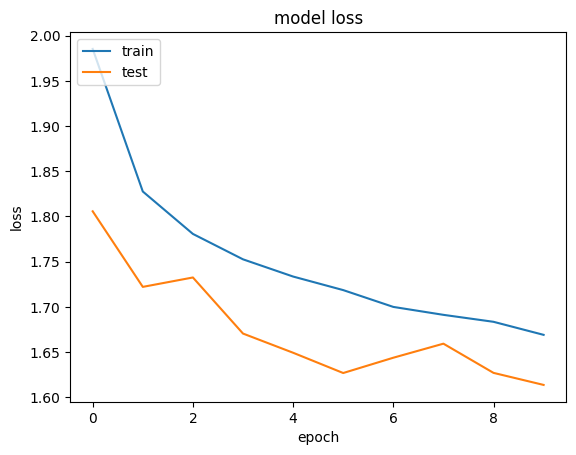

1563/1563 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      5000
           1       0.53      0.61      0.57      5000
           2       0.26      0.20      0.23      5000
           3       0.33      0.32      0.32      5000
           4       0.32      0.47      0.38      5000
           5       0.48      0.21      0.29      5000
           6       0.43      0.54      0.48      5000
           7       0.43      0.58      0.49      5000
           8       0.62      0.49      0.55      5000
           9       0.46      0.48      0.47      5000

    accuracy                           0.43     50000
   macro avg       0.44      0.43      0.43     50000
weighted avg       0.44      0.43      0.43     50000

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.56      0.42      0.48      1000
           1       0

In [34]:
# train the model using dropout=0.1 for each layer
# Optimizer = Adam

from keras.layers import Dropout
model = Sequential()
model.add(Dense(150, input_dim=3072, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_function(history)
classification_report_function(model, x_train, y_train)

# test performance
# print percission, recall, f1-score for test data

classification_report_function(model, x_test, y_test)

`Result of using the Dropout in the training process of model`

The accuracy is improved and the training time is reduced.